In [51]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

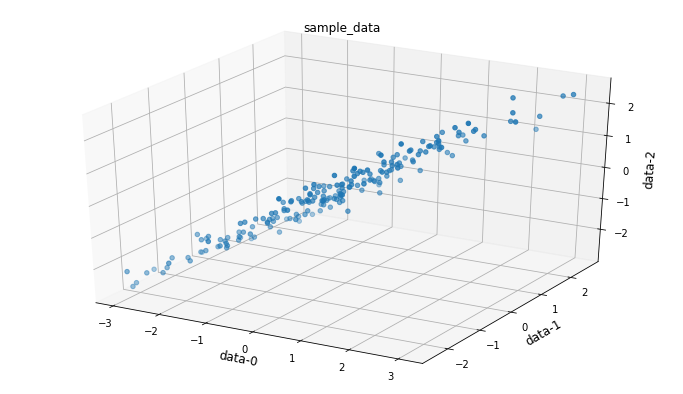

In [5]:
rand_state = np.random.RandomState(53) # initialize with seed

sample_data = np.dot(rand_state.rand(3,3), rand_state.randn(3,200)).T

## plot sample_data
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sample_data[:, 0], sample_data[:, 1], sample_data[:, 2])
ax.set_xlabel('data-0', fontsize=12)
ax.set_ylabel('data-1', fontsize=12)
ax.set_zlabel('data-2', fontsize=12)
plt.title('sample_data')
plt.show()

In [6]:
# calculate mean of each dimension
mean = np.mean(sample_data, axis=0)

# subtract mean from the data so as to center the data around mean
# this helps us the scale the data
sample_data_scaled = np.subtract(sample_data, mean)

# calculate covariance of this scaled_data
covariance = np.cov(sample_data_scaled.T)

eig_val, eig_vec = np.linalg.eig(covariance)

# arrange eig_values to go from big to small
idx = eig_val.argsort()[::-1]
eig_val = eig_val[idx]
eig_vec = eig_vec[:,idx]

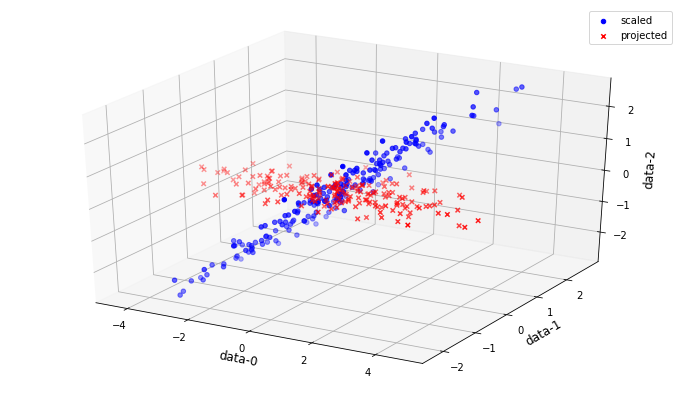

In [7]:
# project data into eigen space
projected_data = np.matmul(sample_data_scaled, eig_vec)

# plot projected and original data to see the difference
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sample_data_scaled[:, 0], sample_data_scaled[:, 1], sample_data_scaled[:, 2], marker='o', color='b', label='scaled')
ax.scatter(projected_data[:, 0], projected_data[:, 1], projected_data[:, 2], marker='x', color='r', label='projected')

ax.set_xlabel('data-0', fontsize=12)
ax.set_ylabel('data-1', fontsize=12)
ax.set_zlabel('data-2', fontsize=12)
ax.legend()
plt.show()

In [8]:
# analysis on the projected data
proj_data_covariance = np.cov(projected_data.T)
print("projected_covariance: \n", proj_data_covariance)

proj_cov_trace = np.trace(proj_data_covariance)

# now see how much each dimension is contributing to
# to the total variance
print("var_coverage_1: ", proj_data_covariance[0,0]/proj_cov_trace)
print("var_coverage_1+2: ", (proj_data_covariance[0,0] + proj_data_covariance[1,1])/proj_cov_trace)

projected_covariance: 
 [[ 3.37929153e+00  3.07022714e-17 -7.02955282e-16]
 [ 3.07022714e-17  1.75174407e-01  5.66827434e-16]
 [-7.02955282e-16  5.66827434e-16  2.37311052e-02]]
var_coverage_1:  0.9444118058683061
var_coverage_1+2:  0.9933678595928005


In [9]:
# perform the same above analysis with sklearn toolbox to compare
from sklearn.decomposition import PCA

# create PCA instance
pca_sk = PCA(n_components=3)

# do the fit
pca_sk.fit(sample_data)

# extract fitted components
# these should be same as what we calculated manually
print("pca_components: ", pca_sk.components_)       # eigen vectors
print("pca_variance: ", pca_sk.explained_variance_) # eigen values

# now transform data
# this is nothing but projecting our sample data into eigen space
projected_data_sk = pca_sk.transform(sample_data)

pca_components:  [[ 0.66116547  0.48642722  0.57118192]
 [ 0.12552085 -0.8223215   0.55500619]
 [ 0.73966529 -0.29525569 -0.60474733]]
pca_variance:  [3.37929153 0.17517441 0.02373111]


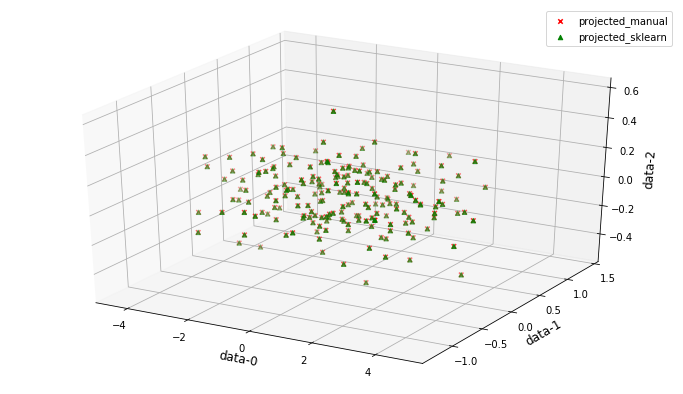

In [10]:
# now plot manually projected data vs sklearn transform method based data
# plot projected and original data to see the difference
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(projected_data[:, 0], projected_data[:, 1], projected_data[:, 2], marker='x', color='r', label='projected_manual')
ax.scatter(projected_data_sk[:, 0], projected_data_sk[:, 1], projected_data_sk[:, 2], marker='^', color='g', label='projected_sklearn')
ax.set_xlabel('data-0', fontsize=12)
ax.set_ylabel('data-1', fontsize=12)
ax.set_zlabel('data-2', fontsize=12)
ax.legend()
plt.show()

### PCA for hand written digits
- Use PCA to reduce dimensions and use it to do noise filtering on the data  

**[PCA-filtering-tutorial](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)**

In [11]:
## PCA for Hand-written digits
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

# these digits are 8x8 pixels

(1797, 64)

In [12]:
pca_digits = PCA(n_components=2) # reduce 64 dimensions to 2 dimensions

# now do the fit (means calculate eigen_vector and eigen_values) and project the data into eigen space
projected_digits = pca_digits.fit_transform(digits.data)
print(projected_digits.shape)

(1797, 2)


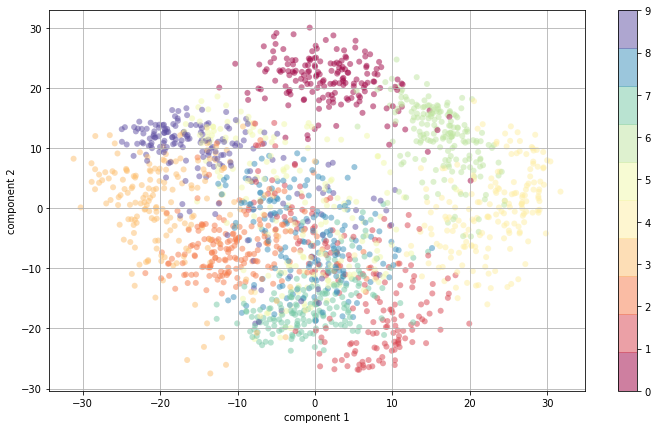

In [13]:
from matplotlib import cm

plt.figure(figsize=(12,7))
plt.scatter(projected_digits[:, 0], projected_digits[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.grid(True)
plt.colorbar();

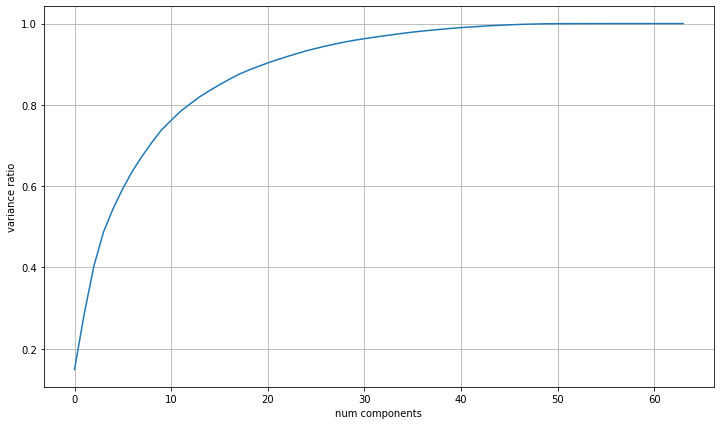

In [14]:
# choosing number of basis vectors to best represent the data that has most variance in the data
pca_loose = PCA().fit(digits.data)
plt.figure(figsize=(12,7))
plt.plot(np.cumsum(pca_loose.explained_variance_ratio_))
plt.xlabel('num components')
plt.ylabel('variance ratio')
plt.grid(True)
plt.show()

In [15]:
# extracting features from faces
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

In [19]:
print(faces.data.shape)

# as this data has 2914 dimensions, using RandomizedPCA will be much faster
# n_components cannot exceed min(data_size, feature_size)
pca_faces = PCA(n_components=150, svd_solver='randomized') # original is 150 basis vectors

# calculate eigen_values and eigen_vectors
pca_faces.fit(faces.data) 

# now project the sample data into eigen space
transformed_faces = pca_faces.transform(faces.data) 

# transform back projected data from eigen space into original feature space
projected_faces   = pca_faces.inverse_transform(transformed_faces) 

(1348, 2914)


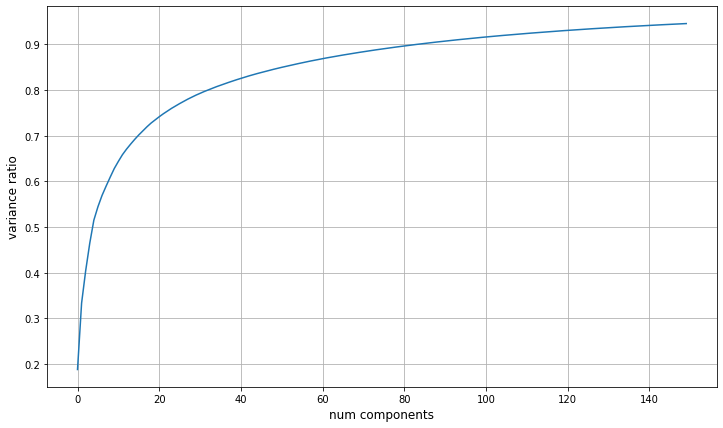

In [20]:
## see the contribution of each projected feature in eigen_space in overall variance
plt.figure(figsize=(12,7))
plt.plot(np.cumsum(pca_faces.explained_variance_ratio_))
plt.xlabel('num components', fontsize=12)
plt.ylabel('variance ratio', fontsize=12)
plt.grid(True)

plt.show()

after_dimension_reduction
original
eigen_vectors


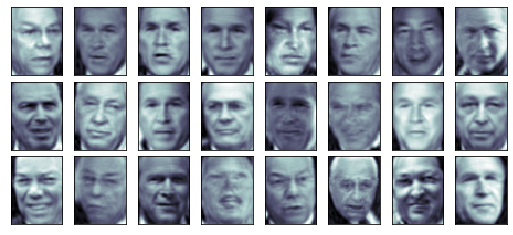

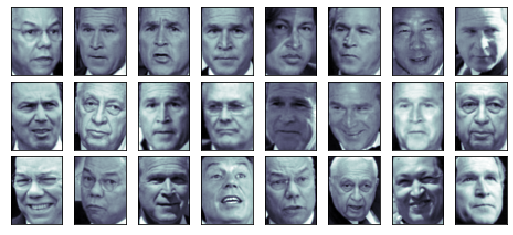

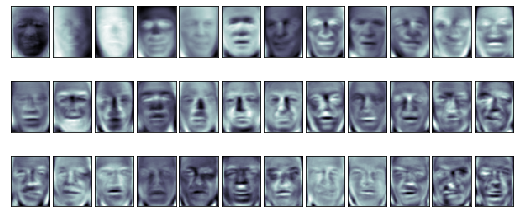

In [21]:
print("after_dimension_reduction")
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(projected_faces[i].reshape(62, 47), cmap='bone')

print("original")
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.data[i].reshape(62, 47), cmap='bone')

print("eigen_vectors")
fig, axes = plt.subplots(3, 12, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca_faces.components_[i].reshape(62, 47), cmap='bone')

In [32]:
# performe KMeans clustering of the features
from sklearn.cluster import KMeans
n_clusters = 50 # original is 135

kmeans_faces = KMeans(n_clusters=n_clusters,
                      init='k-means++',
                      n_init=10,
                      max_iter=300,
                      tol=1e-4,
                      verbose=0)

# do K-means clustering in eigen space
kmeans_faces.fit(transformed_faces)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=50, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [33]:
# output of this would be for each data_point it will have a cluster index
clusters = kmeans_faces.predict(transformed_faces)
cluster_centers_sk = kmeans_faces.cluster_centers_

In [ ]:
## show first 5 clustered features
queried_cluster = 89
queried_cluster_indices = np.where(clusters==queried_cluster)
queried_data_to_cluster_transformed = transformed_faces[queried_cluster_indices, :][0]
queried_data_to_cluster = pca_faces.inverse_transform(queried_data_to_cluster_transformed)

# plot
num_cols = 8
num_rows = np.ceil(queried_data_to_cluster.shape[0]/num_cols)
num_rows = int(num_rows)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    if (i >= int(queried_data_to_cluster.shape[0])):
        break
    ax.imshow(queried_data_to_cluster[i].reshape(62, 47), cmap='bone')

# KMeans algorithm
### Initializing K-Clusters

In [60]:
# kmeans++ algorithm to select initial cluster centroids for k-means clusters
def kMeanspp(sample_data, n_clusters=10):
    n_clusters      = 50
    n_samples       = sample_data.shape[0]
    n_features      = sample_data.shape[1]
    sample_cluster_indices = np.zeros((n_samples), dtype=int)

    cluster_centers = np.zeros((n_clusters, n_features))

    # pick a point uniformly at random from a given sample and use it as a first centroid
    random_point = int(np.random.uniform(0, n_samples-1, 1)[0])
    cluster_centers[0] = sample_data[random_point]

    cur_cluster_count = 1
    for cluster_to_find in range(1, n_clusters):
        new_cluster_max_dist = 0.0
        new_cluster_sample_idx = 0

        for sample_idx in range(0, n_samples):
            this_sample_min_dist   = 0.0
            initialize_min_dist    = True

            for cluster_idx in range(0, cur_cluster_count):
                # calculate square of distance in N-dimensions
                dist_to_cluster = np.sum( np.power(np.subtract(sample_data[sample_idx], cluster_centers[cluster_idx]), 2.0))

                if ((this_sample_min_dist > dist_to_cluster) or (initialize_min_dist == True)):
                    this_sample_min_dist = dist_to_cluster
                    sample_cluster_indices[sample_idx] = cluster_idx
                    initialize_min_dist = False

            if (this_sample_min_dist > new_cluster_max_dist):
                new_cluster_max_dist = this_sample_min_dist
                new_cluster_sample_idx = sample_idx

        cluster_centers[cluster_to_find] = sample_data[new_cluster_sample_idx]
        cur_cluster_count = cur_cluster_count + 1

    # finally loop over 1 more for final cluster to get closest data points for the final cluster
    for sample_idx in range(0, n_samples):
        this_sample_min_dist   = 0.0
        initialize_min_dist    = True
        for cluster_idx in range(0, n_clusters):

            # calculate square of distance in N-dimensions
            dist_to_cluster = np.sum( np.power(np.subtract(sample_data[sample_idx], cluster_centers[cluster_idx]), 2.0))

            if ((this_sample_min_dist > dist_to_cluster) or (initialize_min_dist == True)):
                this_sample_min_dist = dist_to_cluster
                sample_cluster_indices[sample_idx] = cluster_idx
                initialize_min_dist = False
                
    return cluster_centers, sample_cluster_indices

### KMeans clustering algorithm

As a side note, one of the main computation elements of the K-means algorithm is calculating norm between a data sample X and cluster centroid C. To get around this, to avoid unnecessary computation, a lower bound can be used. So, if $||X-C||_2$ is greater than this bound, then the computation can be skipped. 
**[speeding_up_KMeans_via_blockification](https://avira.github.io/dsblog/2016-09-01-speeding-up-k-means.html)**

In [62]:
def kMeans_unoptimized(sample_data, cluster_centers, sample_cluster_indices, n_iter=300, tol=1e-2):
    old_distance   = 0
    n_clusters     = cluster_centers.shape[0]
    n_samples      = sample_data.shape[0]
    distances_list = []

    for iteration in range(0, n_iter):
        new_distance = 0
        
        # calculate new cluster centroids by averaging data associated to respective cluster
        for cluster_idx in range(0, n_clusters):
            this_cluster_sample_indices = np.where(sample_cluster_indices==cluster_idx)[0]
            this_cluster_samples = transformed_faces[this_cluster_sample_indices]

            # calculate new center
            this_cluster_new_center = np.average(this_cluster_samples, axis=0)
            new_distance = new_distance + np.linalg.norm(np.subtract(this_cluster_new_center, cluster_centers[cluster_idx]))
            cluster_centers[cluster_idx] = this_cluster_new_center

        if (np.abs(new_distance - old_distance) < tol):
            break
        else:
            old_distance = new_distance
            distances_list.append(old_distance)

        for sample_idx in range(0, n_samples):
            this_sample_min_dist   = 0.0
            initialize_min_dist    = True
            for cluster_idx in range(0, n_clusters):

                # calculate square of distance in N-dimensions
                dist_to_cluster = np.sum( np.power(np.subtract(sample_data[sample_idx], cluster_centers[cluster_idx]), 2.0))

                if ((this_sample_min_dist > dist_to_cluster) or (initialize_min_dist == True)):
                    this_sample_min_dist               = dist_to_cluster
                    sample_cluster_indices[sample_idx] = cluster_idx
                    initialize_min_dist = False
    
    return cluster_centers, distances_list

## Optimized K-Means using Cauchy-Schwartz inequality

In [63]:
def lower_bound(data_sample_2norm, cluster_center_2norm):
    return np.abs(data_sample_2norm - cluster_center_2norm)

In [64]:
def kMeans_optimized(sample_data, cluster_centers, sample_cluster_indices, n_iter=300, tol=1e-2):
    old_distance   = 0
    n_clusters     = cluster_centers.shape[0]
    n_samples      = sample_data.shape[0]
    distances_list = []
    cluster_norms  = [None]*n_clusters
    sample_norms   = [None]*n_samples

    for iteration in range(0, n_iter):
        new_distance = 0
        # calculate new cluster centroids by averaging data associated to respective cluster
        for cluster_idx in range(0, n_clusters):
            this_cluster_sample_indices = np.where(sample_cluster_indices==cluster_idx)[0]
            this_cluster_samples = transformed_faces[this_cluster_sample_indices]

            # calculate new center
            this_cluster_new_center = np.average(this_cluster_samples, axis=0)
            new_distance = new_distance + np.linalg.norm(np.subtract(this_cluster_new_center, cluster_centers[cluster_idx]))
            cluster_centers[cluster_idx] = this_cluster_new_center
            cluster_norms[cluster_idx]   = np.linalg.norm(cluster_centers[cluster_idx])

        if (np.abs(new_distance - old_distance) < tolerance):
            break
        else:
            old_distance = new_distance
            distances_list.append(old_distance)

        for sample_idx in range(0, n_samples):
            if (sample_norms[sample_idx] == None):
                sample_norms[sample_idx] = np.linalg.norm(sample_data[sample_idx])

            this_sample_min_dist   = 0.0
            initialize_min_dist    = True
            for cluster_idx in range(0, n_clusters):
                lower_bound_dist = lower_bound(sample_norms[sample_idx], cluster_norms[cluster_idx])
                skip_cluster = False

                if (initialize_min_dist == False):
                    if (lower_bound_dist > this_sample_min_dist):
                        skip_cluster = True

                if (skip_cluster == False):
                    # calculate square of distance in N-dimensions
                    dist_to_cluster = np.sum( np.power(np.subtract(sample_data[sample_idx], cluster_centers[cluster_idx]), 2.0))

                    if ((this_sample_min_dist > dist_to_cluster) or (initialize_min_dist == True)):
                        this_sample_min_dist               = dist_to_cluster
                        sample_cluster_indices[sample_idx] = cluster_idx
                        initialize_min_dist = False
    
    return cluster_centers, distances_list

As we can't visualize n-dimensions in space, creating a heatmap of the cluster centroids in component space will give us the information on how these clusters are spaced

In [ ]:
# perform comparison of runtime between KMeans_unoptimized vs KMeans_optimized
n_runs = 2
unoptimized_avg_runtime = 0.0
optimized_avg_runtime   = 0.0

# unoptimized KMeans
for run in range(0, n_runs):
    cluster_init, sample_cluster_indices = kMeanspp(transformed_faces, n_clusters=n_clusters)
    start_time = time.time()
    cluster_centers, total_iter_cost     = kMeans_unoptimized(transformed_faces, 
                                                              cluster_init, 
                                                              sample_cluster_indices, 
                                                              n_iter=300)
    end_time = time.time()
    unoptimized_avg_runtime = unoptimized_avg_runtime + (end_time-start_time)
    print("#", run)

# optimized kMeans
for run in range(0, n_runs):
    cluster_init, sample_cluster_indices = kMeanspp(transformed_faces, n_clusters=n_clusters)
    start_time = time.time()
    cluster_centers, total_iter_cost     = kMeans_optimized(transformed_faces, 
                                                            cluster_init, 
                                                            sample_cluster_indices, 
                                                            n_iter=300)
    end_time = time.time()
    optimized_avg_runtime = optimized_avg_runtime + (end_time-start_time)

In [70]:
print("unoptimized_avg_runtime: ", unoptimized_avg_runtime)
print("optimized_avg_runtime: ", optimized_avg_runtime)

unoptimized_avg_runtime:  44.55249762535095
optimized_avg_runtime:  55.04953408241272


In [1]:
# centroid distance movement
plt.figure(figsize=(12,7))
plt.plot(distances_list, 'b-o', markersize=4, linewidth=2)
plt.grid(True)
plt.xlabel('Iteration', fontsize=12)
plt.title('Distance from centroid_k-1 to centroid_k', fontsize=12)
plt.show()

# show heatmap of cluster centroids
import seaborn as sns
import pandas  as pd

cluster_df = pd.DataFrame(cluster_centers)
index_list = [None]*n_clusters
for cluster_idx in range(0, n_clusters):
    index_list[cluster_idx] =  "c_" + str(cluster_idx)
cluster_df.index = index_list

plt.figure(figsize = (12,9))
ax = sns.heatmap(cluster_df, cmap = 'YlGnBu')
ax.set_ylabel("Cluster", fontsize=14)
ax.set_xlabel("Eigen dimensions", fontsize=14)
ax.set_title('Manual Clustering with Kmeans++')
plt.yticks(fontsize = 11)
plt.xticks(fontsize = 11)
plt.show()


## now cluster centers from SkLearn as well to see the difference
cluster_sk_df = pd.DataFrame(cluster_centers_sk)
cluster_sk_df.index = index_list

plt.figure(figsize = (12,9))
ax = sns.heatmap(cluster_sk_df, cmap = 'YlGnBu')
ax.set_ylabel("Cluster", fontsize=14)
ax.set_xlabel("Eigen dimensions", fontsize=14)
ax.set_title('SKLearn Clustering with Kmeans++')
plt.yticks(fontsize = 11)
plt.xticks(fontsize = 11)
plt.show()


NameError: name 'plt' is not defined